In [1]:
#import libraries

import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import statistics

# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px    #module for graphs
import seaborn as sns
sns.set()
sns.set_theme(style='whitegrid', palette='muted')

# Date
from datetime import date

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer  # module for feature selection & evaluation

In [2]:
#import flight dataset
flight_df = pd.read_csv('Customer Flight Activity.csv')
print("Customer Flight Activity")

display(flight_df)

Customer Flight Activity


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [3]:
#import loyalty dataset
loyalty_df = pd.read_csv('Customer Loyalty History.csv')
print("Customer Loyalty History")

display(loyalty_df)

Customer Loyalty History


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [4]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [5]:
loyalty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [6]:
new_flight = flight_df.groupby('Loyalty Number', as_index = False).sum() 

display(new_flight)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,48420,156,157,35,192,50682,5376.00,1513,123
1,100102,48420,156,173,42,215,40222,4115.25,1195,96
2,100140,48420,156,152,38,190,41252,4184.25,593,48
3,100214,48420,156,79,17,96,33982,3426.00,861,70
4,100272,48420,156,127,36,163,40872,4108.04,1007,82
...,...,...,...,...,...,...,...,...,...,...
16732,999902,48420,156,178,47,225,57227,6056.50,876,71
16733,999911,48420,156,0,0,0,0,0.00,0,0
16734,999940,48420,156,63,23,86,23410,2415.00,672,54
16735,999982,48420,156,22,2,24,5948,594.00,0,0


In [7]:
# Merging both the Customer Loyalty and Customer Flights Dataset based on Loyalty Number column.
airline_df = pd.merge(new_flight, loyalty_df, on='Loyalty Number', how='inner')

display(airline_df)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,48420,156,157,35,192,50682,5376.00,1513,123,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,48420,156,173,42,215,40222,4115.25,1195,96,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,48420,156,152,38,190,41252,4184.25,593,48,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,48420,156,79,17,96,33982,3426.00,861,70,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,48420,156,127,36,163,40872,4108.04,1007,82,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,999902,48420,156,178,47,225,57227,6056.50,876,71,...,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
16733,999911,48420,156,0,0,0,0,0.00,0,0,...,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
16734,999940,48420,156,63,23,86,23410,2415.00,672,54,...,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
16735,999982,48420,156,22,2,24,5948,594.00,0,0,...,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [8]:
# Create summry data Info
# Find out unique value, number of missing values & datatype of each column (Numerical and Non-Numerical)

list = []

for col in airline_df.columns:
    # Get the top value and its count (using value_counts().idxmax())
    top_value = airline_df[col].value_counts().idxmax()  # Corrected method
    top_count = airline_df[col].value_counts().max()
    list.append([
        col, 
        airline_df[col].dtype, 
        airline_df[col].isna().sum(), 
        100*airline_df[col].isna().sum()/len(airline_df[col]),
        airline_df[col].unique()[0:3], 
        airline_df[col].nunique(),
        top_value,  # Include top values with frequencies
        top_count])
        
    
df_summary = pd.DataFrame(
            data=list, 
            columns=[
            'Feature', 
            'Dtype', 
            'NaN',
            '%NaN',
            'Unique', 
            'Total Unique', 
            'Top', 
            'Frequency']
)

df_summary

,Feature,Dtype,NaN,%NaN,Unique,Total Unique,Top,Frequency
0,Loyalty Number,int64,0,0.000000,"[100018, 100102, 100140]",16737,999986,1
1,Year,int64,0,0.000000,"[48420, 96840, 145260]",3,48420,16574
2,Month,int64,0,0.000000,"[156, 312, 468]",3,156,16574
3,Flights Booked,int64,0,0.000000,"[157, 173, 152]",268,0,1501
4,Flights with Companions,int64,0,0.000000,"[35, 42, 38]",92,0,1822
5,Total Flights,int64,0,0.000000,"[192, 215, 190]",328,0,1501
6,Distance,int64,0,0.000000,"[50682, 40222, 41252]",12714,0,1501
7,Points Accumulated,float64,0,0.000000,"[5376.0, 4115.25, 4184.25]",12081,0.0,1501
8,Points Redeemed,int64,0,0.000000,"[1513, 1195, 593]",2329,0,5177
9,Dollar Cost Points Redeemed,int64,0,0.000000,"[123, 96, 48]",283,0,5177


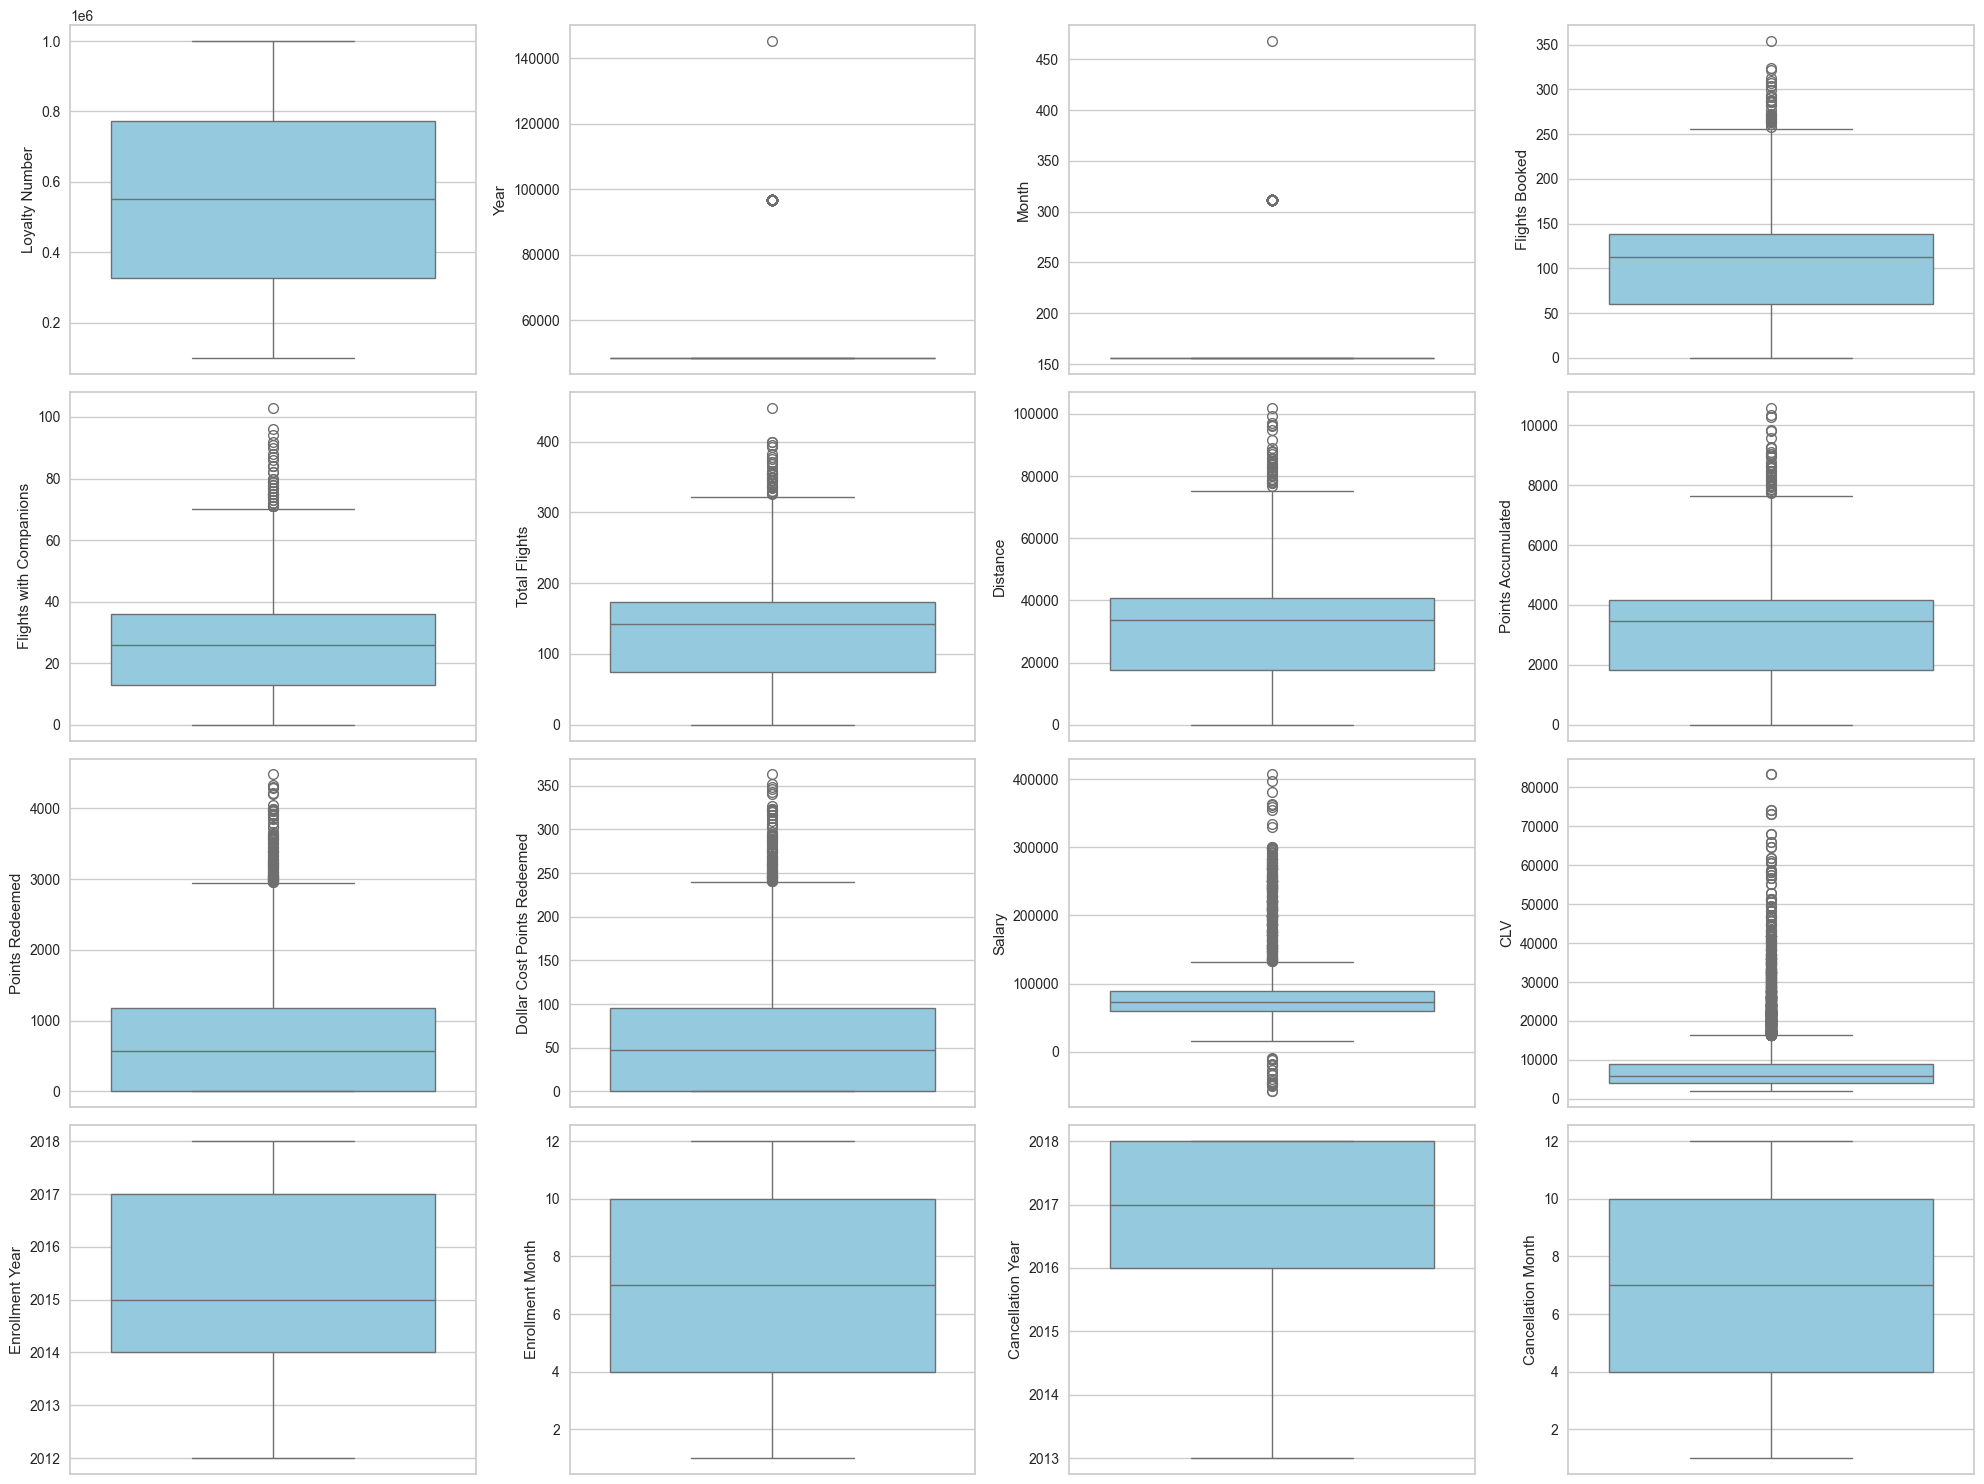

In [9]:
# Checking for Outliers

nums = airline_df.select_dtypes(include=[np.number], exclude=[bool]).columns

plt.figure(figsize=(20,15))
features = nums
for i in range(0, len(features)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=airline_df[features[i]], color='skyblue')
    plt.tight_layout()

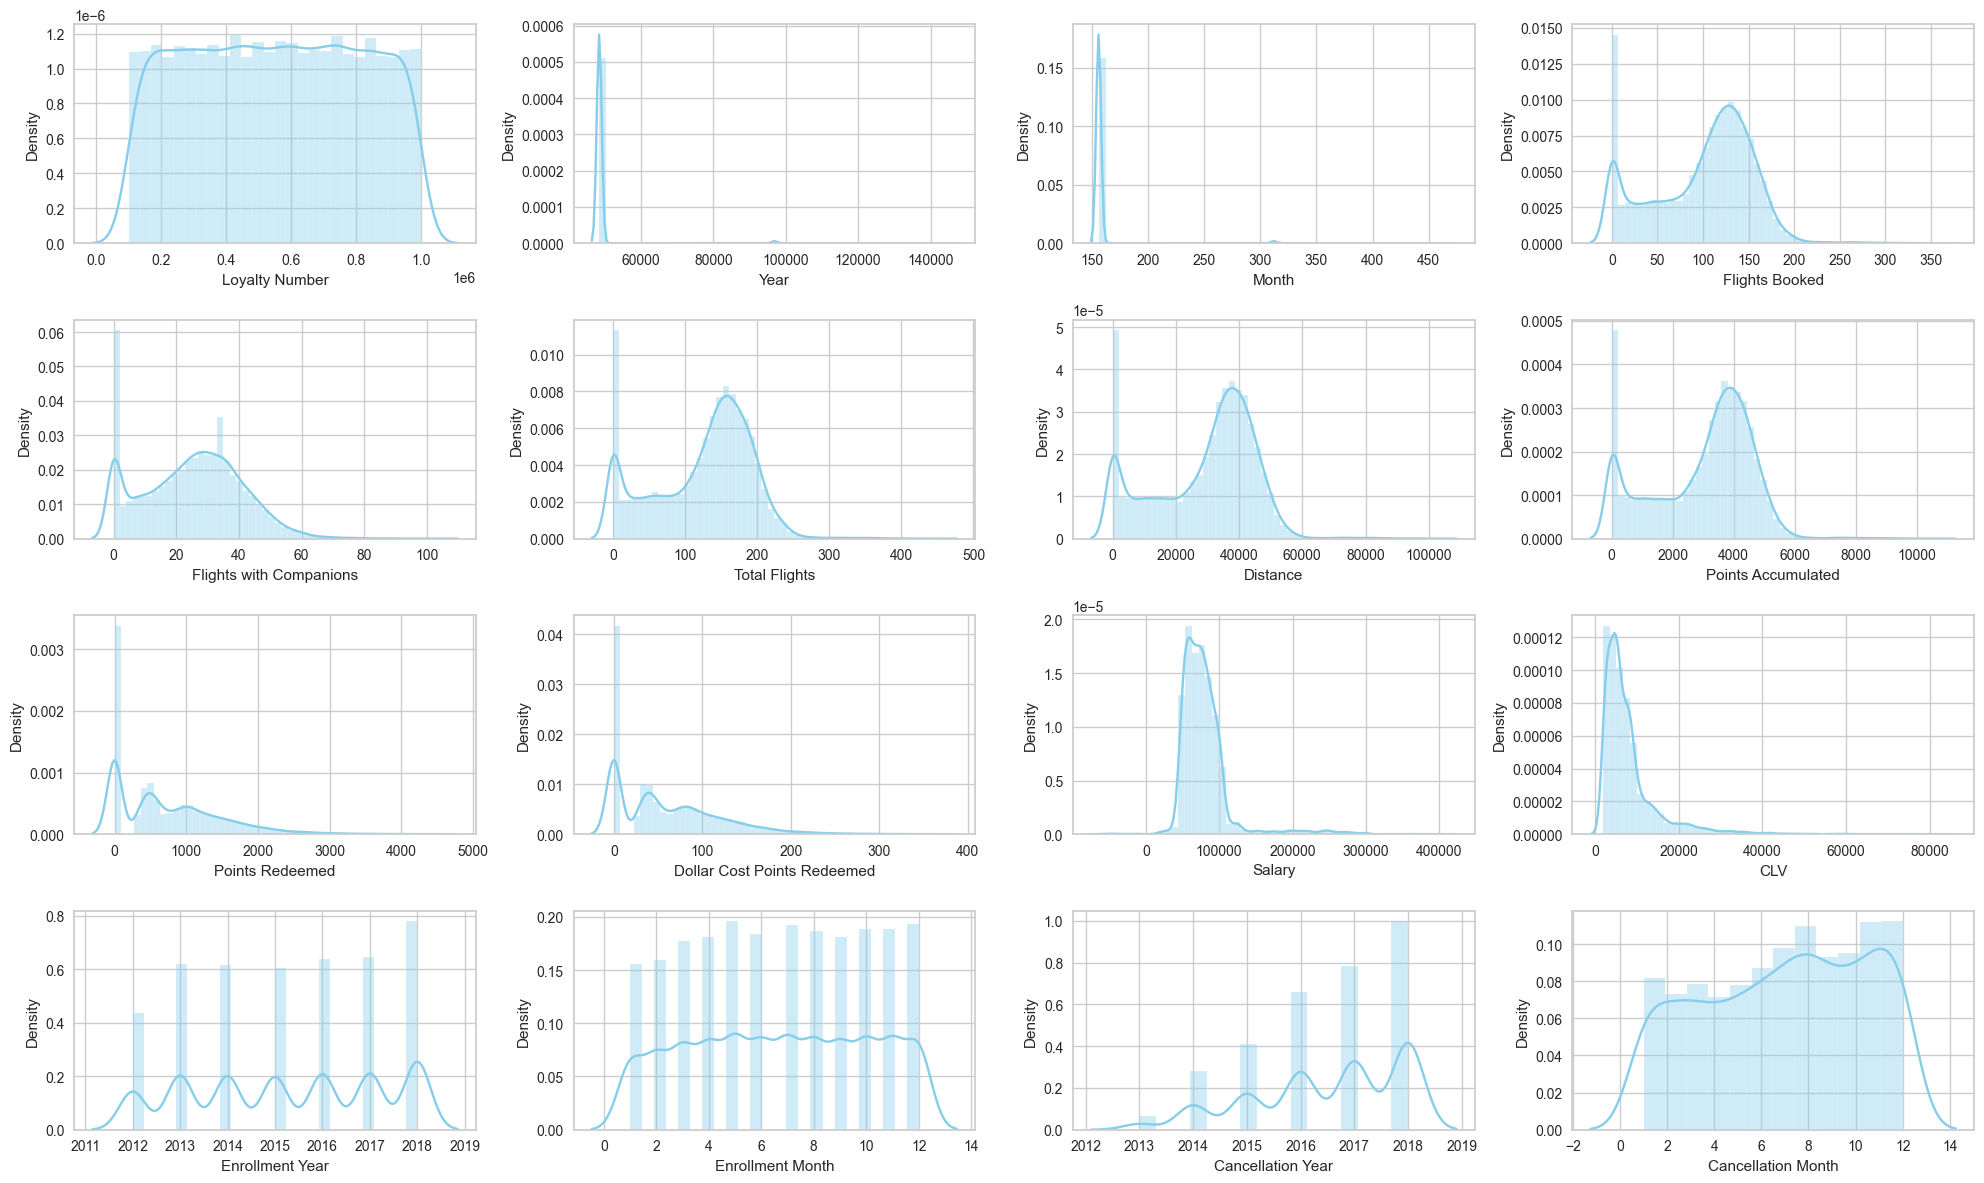

In [10]:
# Graph of Data Distribution

plt.figure(figsize=(20,12))

for i in range(0, len(features)):
    plt.subplot(4, 4, i+1)
    sns.distplot(x=airline_df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

In [11]:
airline_encoded=pd.get_dummies(airline_df, columns=['Gender', 'Loyalty Card'])
airline_encoded

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Gender_Female,Gender_Male,Loyalty Card_Aurora,Loyalty Card_Nova,Loyalty Card_Star
0,100018,48420,156,157,35,192,50682,5376.00,1513,123,...,Standard,2016,8,NaN,NaN,True,False,True,False,False
1,100102,48420,156,173,42,215,40222,4115.25,1195,96,...,Standard,2013,3,NaN,NaN,False,True,False,True,False
2,100140,48420,156,152,38,190,41252,4184.25,593,48,...,Standard,2016,7,NaN,NaN,True,False,False,True,False
3,100214,48420,156,79,17,96,33982,3426.00,861,70,...,Standard,2015,8,NaN,NaN,False,True,False,False,True
4,100272,48420,156,127,36,163,40872,4108.04,1007,82,...,Standard,2014,1,NaN,NaN,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,999902,48420,156,178,47,225,57227,6056.50,876,71,...,Standard,2014,5,NaN,NaN,False,True,True,False,False
16733,999911,48420,156,0,0,0,0,0.00,0,0,...,Standard,2012,8,NaN,NaN,False,True,False,True,False
16734,999940,48420,156,63,23,86,23410,2415.00,672,54,...,Standard,2017,7,NaN,NaN,True,False,False,True,False
16735,999982,48420,156,22,2,24,5948,594.00,0,0,...,Standard,2018,7,NaN,NaN,False,True,False,False,True


In [12]:
# Create a correlation matrix
num = airline_encoded.select_dtypes(include=['int64', 'float64', 'boolean']).columns

correlation_matrix = airline_encoded[num].corr()

fig0 = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale='Viridis',
                title='Correlation Heatmap of Features')

# Show the plot
fig0.show()

In [13]:
# Remove columns 'Country', 'Province' & 'Dollar Cost Points Redeemed'
final_df = airline_df.drop([
         'Country',
         'Province',
         'Postal Code',
         'Dollar Cost Points Redeemed', 
         'Year',
         'Month',
         'Enrollment Month',
         'Cancellation Month'
        ], axis=1)

# Display results
final_df

,Loyalty Number,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,City,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Cancellation Year
0,100018,157,35,192,50682,5376.00,1513,Edmonton,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,NaN
1,100102,173,42,215,40222,4115.25,1195,Toronto,Male,College,NaN,Single,Nova,2887.74,Standard,2013,NaN
2,100140,152,38,190,41252,4184.25,593,Dawson Creek,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,NaN
3,100214,79,17,96,33982,3426.00,861,Vancouver,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,NaN
4,100272,127,36,163,40872,4108.04,1007,Toronto,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,999902,178,47,225,57227,6056.50,876,Toronto,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,NaN
16733,999911,0,0,0,0,0.00,0,St. John's,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,NaN
16734,999940,63,23,86,23410,2415.00,672,Quebec City,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,NaN
16735,999982,22,2,24,5948,594.00,0,Victoria,Male,College,NaN,Married,Star,2631.56,Standard,2018,NaN


<Axes: >

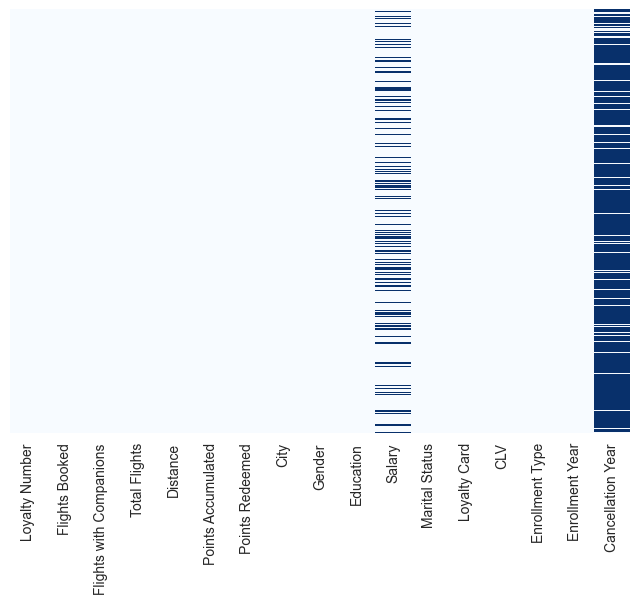

In [14]:
# Let's see if we have any missing data.
sns.heatmap(final_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [15]:
new_final_deduped = final_df.drop_duplicates()

print("Number of records after removing duplicates : {}".format(new_final_deduped.shape[0]))
print("Number of records in original dataset : {}".format(final_df.shape[0]))

new_final_deduped

Number of records after removing duplicates : 16737
Number of records in original dataset : 16737


,Loyalty Number,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,City,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Cancellation Year
0,100018,157,35,192,50682,5376.00,1513,Edmonton,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,NaN
1,100102,173,42,215,40222,4115.25,1195,Toronto,Male,College,NaN,Single,Nova,2887.74,Standard,2013,NaN
2,100140,152,38,190,41252,4184.25,593,Dawson Creek,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,NaN
3,100214,79,17,96,33982,3426.00,861,Vancouver,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,NaN
4,100272,127,36,163,40872,4108.04,1007,Toronto,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,999902,178,47,225,57227,6056.50,876,Toronto,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,NaN
16733,999911,0,0,0,0,0.00,0,St. John's,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,NaN
16734,999940,63,23,86,23410,2415.00,672,Quebec City,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,NaN
16735,999982,22,2,24,5948,594.00,0,Victoria,Male,College,NaN,Married,Star,2631.56,Standard,2018,NaN


In [16]:
final_df['Cancelled'] = final_df['Cancellation Year'].notna().astype(int) 
final_df

,Loyalty Number,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,City,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Cancellation Year,Cancelled
0,100018,157,35,192,50682,5376.00,1513,Edmonton,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,NaN,0
1,100102,173,42,215,40222,4115.25,1195,Toronto,Male,College,NaN,Single,Nova,2887.74,Standard,2013,NaN,0
2,100140,152,38,190,41252,4184.25,593,Dawson Creek,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,NaN,0
3,100214,79,17,96,33982,3426.00,861,Vancouver,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,NaN,0
4,100272,127,36,163,40872,4108.04,1007,Toronto,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,999902,178,47,225,57227,6056.50,876,Toronto,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,NaN,0
16733,999911,0,0,0,0,0.00,0,St. John's,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,NaN,0
16734,999940,63,23,86,23410,2415.00,672,Quebec City,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,NaN,0
16735,999982,22,2,24,5948,594.00,0,Victoria,Male,College,NaN,Married,Star,2631.56,Standard,2018,NaN,0


In [17]:
# Save the merged + cleaned dataset as a CSV file
final_df.to_csv('Merged Customer Loyalty Flights.csv', index=False)

In [18]:
# Create a count of customers by city
city_counts = new_final_deduped['City'].value_counts().reset_index(name='Count')

# Sort the city counts in descending order
city_counts = city_counts.sort_values(by='Count', ascending=True)  # Descending order

# Create the horizontal bar chart with Plotly Express
fig = px.bar(
    city_counts,  # Data is the city counts Series
    x= 'Count',  # x-axis represents the city names
    y= 'City',  # y-axis represents the city counts (index of the Series)
    orientation='h',  # Set orientation to 'h' for horizontal bars
    title='Distribution of Customers Across Cities',  # Title for the chart
    template='plotly_dark'
)

# Update x-axis title (optional)
fig.update_xaxes(title_text='Number of Customers')

# Show the chart
fig.show()

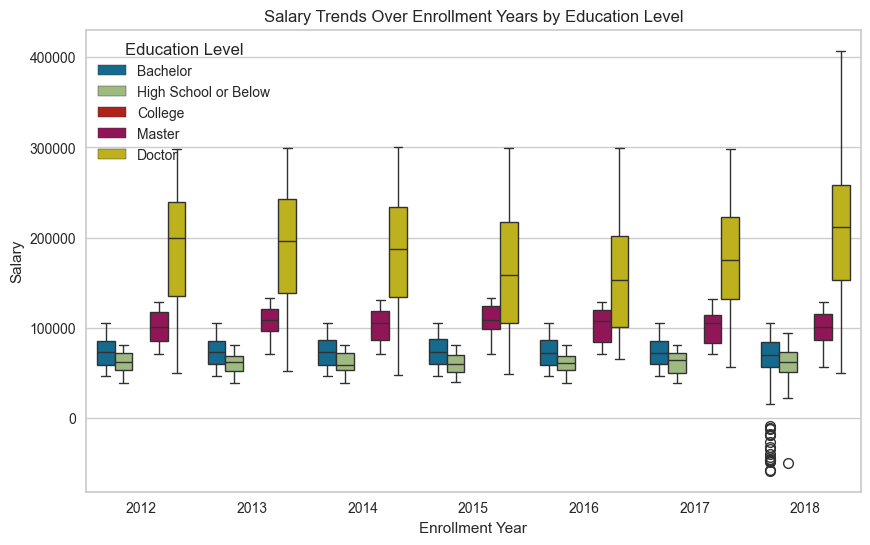

In [19]:
# Education levels and salary trends over enrollment years
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_final_deduped, x='Enrollment Year', y='Salary', hue='Education')
plt.title('Salary Trends Over Enrollment Years by Education Level')
plt.xlabel('Enrollment Year')
plt.ylabel('Salary')
plt.legend(title='Education Level')
plt.show()

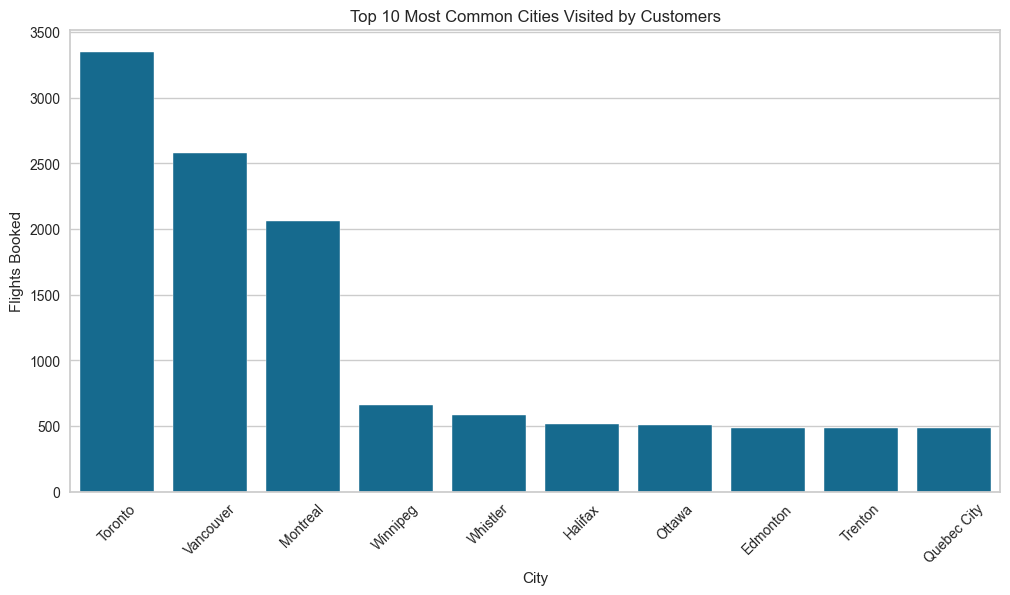

In [20]:
# Top 10 most common routes
top_routes = final_df['City'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_routes.index, y=top_routes.values)
plt.title('Top 10 Most Common Cities Visited by Customers')
plt.xlabel('City')
plt.ylabel('Flights Booked')
plt.xticks(rotation=45)
plt.show()

In [21]:
flights = final_df[new_final_deduped['City'].isin(['Toronto', 'Vancouver', 'Montreal'])]
sum_TVM = flights['Flights Booked'].sum()
sum_total = final_df['Flights Booked'].sum()
percent=(sum_TVM/sum_total)*100

print(f"Out of all the flights booked in Canada, {percent:.2f}% of them are from Toronto, Vancouver or Montreal")

Out of all the flights booked in Canada, 47.77% of them are from Toronto, Vancouver or Montreal


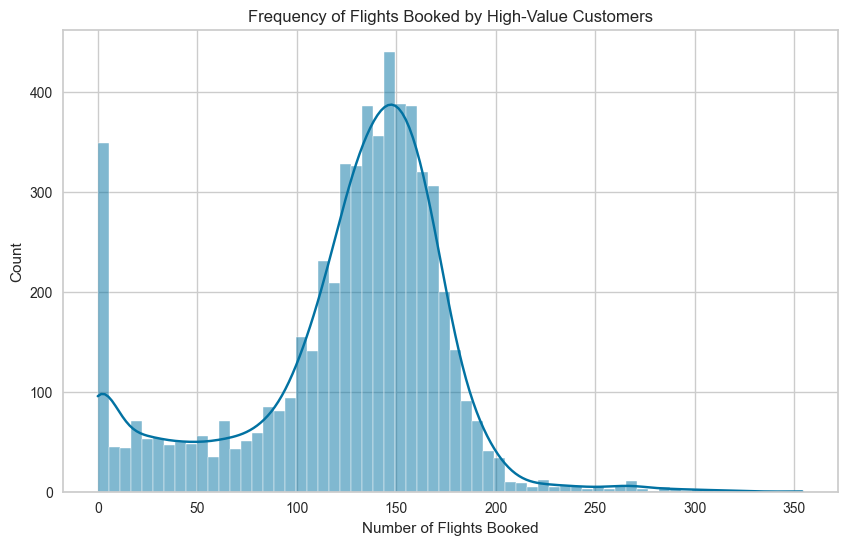

In [22]:
# Define high-value customers based on CLV or total points accumulated
high_value_customers = final_df[(final_df['CLV'] > final_df['CLV'].quantile(0.8)) | (final_df['Points Accumulated'] > final_df['Points Accumulated'].quantile(0.8))]

# Plotting frequency of flights booked by high-value customers
plt.figure(figsize=(10, 6))
sns.histplot(high_value_customers['Flights Booked'], kde=True)
plt.title('Frequency of Flights Booked by High-Value Customers')
plt.xlabel('Number of Flights Booked')
plt.ylabel('Count')
plt.grid(True)
plt.show()

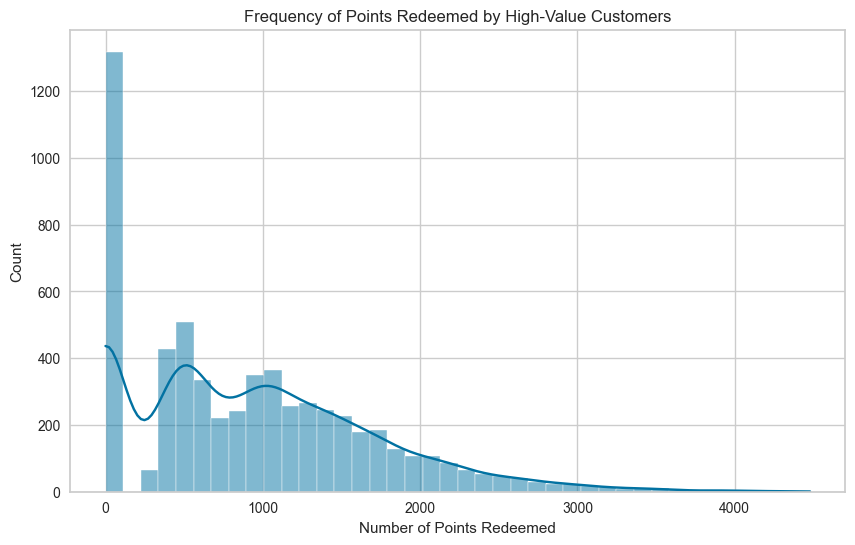

In [23]:
# Plotting frequency of points redeemed by high-value customers
plt.figure(figsize=(10, 6))
sns.histplot(high_value_customers['Points Redeemed'], kde=True)
plt.title('Frequency of Points Redeemed by High-Value Customers')
plt.xlabel('Number of Points Redeemed')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [24]:
fig02 = px.scatter(final_df, x='Points Accumulated', y='Points Redeemed',
                         size='Flights Booked', hover_data=['Loyalty Number'],
                         title='Points Accumulated VS Redeemed, sized by Flights Booked')
fig02.show()

In [25]:
# Trends in frequency of flights booked by loyalty program members over time
loyalty_flights_over_time = final_df.groupby(['Enrollment Year', 'Loyalty Card'])['Flights Booked'].mean().reset_index()
fig03 = px.line(loyalty_flights_over_time, x='Enrollment Year', y='Flights Booked', markers=True, color='Loyalty Card', title='Average Flights Booked Over Time by Loyalty Program')
fig03.show()

In [26]:
fig = px.box(final_df, x='Loyalty Card', y='CLV', color= 'Loyalty Card', title='CLV Variation by Loyalty Card Type')
fig.show()

In [29]:
fig = px.scatter(final_df, x='Flights Booked', y='CLV', 
                color='Loyalty Card', size = 'Flights Booked', trendline='ols', 
                title='CLV vs. Total Flights')

fig.show()

In [30]:
# Map Cancelled values to 'Active' and 'Cancelled'
final_df['Cancellation Status'] = final_df['Cancelled'].map({0: 'Active', 1: 'Cancelled'})

# Plot cancellation distribution based on Loyalty Card column
cancelled_counts = final_df.groupby(['Loyalty Card', 'Cancellation Status']).size().reset_index(name='Count')


fig = px.bar(cancelled_counts, 
             x='Loyalty Card', 
             y='Count', 
             color='Cancellation Status',
             barmode='group', 
             title='Cancellation Distribution by Loyalty Card')

fig.update_layout(xaxis_title='Loyalty Card', 
                  yaxis_title='Count', 
                  legend_title='Cancellation Status')


fig.show()

In [31]:
# Cancellation Rate Analysis
cancellation_rate = final_df['Cancelled'].mean() * 100
print("Cancellation Rate among Program Members: {:.2f}%".format(cancellation_rate))

Cancellation Rate among Program Members: 12.35%


In [32]:
# Grouping data by Enrollment Year to count enrollments per year
enrollments_per_year = final_df.groupby('Enrollment Year')['Loyalty Number'].count().reset_index()
enrollments_per_year.rename(columns={'Loyalty Number': 'Enrollments'}, inplace=True)

# Grouping data by Cancellation Year to count cancellations per year
cancellations_per_year = final_df.groupby('Cancellation Year')['Cancelled'].sum().reset_index()
cancellations_per_year.rename(columns={'Cancelled': 'Cancellations'}, inplace=True)

# Merging enrollments and cancellations data
enrollments_cancellations = enrollments_per_year.merge(cancellations_per_year, how='outer', left_on='Enrollment Year', right_on='Cancellation Year')

# Calculating net enrollments per year
enrollments_cancellations['Net Enrollments'] = enrollments_cancellations['Enrollments'] - enrollments_cancellations['Cancellations']

# Plotting using Plotly Express
fig = px.line(enrollments_cancellations, x='Enrollment Year', y=['Enrollments', 'Cancellations', 'Net Enrollments'],
              markers=True, title='Customer Enrollments, Cancellations, and Net Per Year',
              labels={'value': 'Count', 'variable': 'Type', 'Enrollment Year': 'Year'})
fig.show()

In [33]:
customer = final_df[(final_df['Cancelled'] != 1) & (final_df['Flights Booked'] > 0)]

In [34]:
customer = customer[['Loyalty Number', 'Enrollment Year', 'Flights Booked', 'CLV']]
customer

,Loyalty Number,Enrollment Year,Flights Booked,CLV
0,100018,2016,157,7919.20
1,100102,2013,173,2887.74
2,100140,2016,152,2838.07
3,100214,2015,79,4170.57
4,100272,2014,127,6622.05
...,...,...,...,...
16729,999758,2018,16,18690.34
16732,999902,2014,178,7290.07
16734,999940,2017,63,20266.50
16735,999982,2018,22,2631.56


In [35]:
# Get today's date automatically from the system
today = date.today()

# Calculate Recency (Years) directly within 'customers' DataFrame
customer['Recency'] = today.year - customer['Enrollment Year']

# Group Recency by Loyalty Number (Optional)
# This step is optional but provides Recency details for each customer
recency_group = customer.groupby('Loyalty Number')['Recency'].sum().reset_index()
recency_group.columns = ['Loyalty Number', 'Total Recency (Years)']  # Rename Recency column

# Optionally, merge 'recency_group' with 'customers' for detailed Recency information
# This step is optional but provides both total and individual year Recency
customer = pd.merge(customer, recency_group, on='Loyalty Number', how='left')


# Drop the 'Total Recency (Years)' column if it exists
if 'Total Recency (Years)' in customer.columns:
    customer.drop(columns=['Total Recency (Years)'], inplace=True)

In [36]:
# Display the first few rows of the modified customer DataFrame
customer.head()

,Loyalty Number,Enrollment Year,Flights Booked,CLV,Recency
0,100018,2016,157,7919.20,9
1,100102,2013,173,2887.74,12
2,100140,2016,152,2838.07,9
3,100214,2015,79,4170.57,10
4,100272,2014,127,6622.05,11


In [37]:
# Calculate Frequency: Number of flights booked
frequency = customer.groupby('Loyalty Number')['Flights Booked'].sum().reset_index()
frequency.columns = ['Loyalty Number', 'Frequency']

# Consolidate Frequency to existing Customer DataFrame
customer = pd.merge(customer, frequency, on='Loyalty Number')

customer.head()

,Loyalty Number,Enrollment Year,Flights Booked,CLV,Recency,Frequency
0,100018,2016,157,7919.20,9,157
1,100102,2013,173,2887.74,12,173
2,100140,2016,152,2838.07,9,152
3,100214,2015,79,4170.57,10,79
4,100272,2014,127,6622.05,11,127


In [38]:
# Calculate Monetary: Customer Lifetime Value (CLV)
monetary = customer.groupby('Loyalty Number')['CLV'].sum().reset_index()
monetary.columns = ['Loyalty Number', 'Monetary']

# Consolidate Monetary to existing Customer DataFrame
customer = pd.merge(customer, monetary, on='Loyalty Number')

In [39]:
# Display full customer Dataframe
display(customer)

,Loyalty Number,Enrollment Year,Flights Booked,CLV,Recency,Frequency,Monetary
0,100018,2016,157,7919.20,9,157,7919.20
1,100102,2013,173,2887.74,12,173,2887.74
2,100140,2016,152,2838.07,9,152,2838.07
3,100214,2015,79,4170.57,10,79,4170.57
4,100272,2014,127,6622.05,11,127,6622.05
...,...,...,...,...,...,...,...
14102,999758,2018,16,18690.34,7,16,18690.34
14103,999902,2014,178,7290.07,11,178,7290.07
14104,999940,2017,63,20266.50,8,63,20266.50
14105,999982,2018,22,2631.56,7,22,2631.56


In [40]:
# Create summry data Info
# Find out unique value, number of missing values & datatype of each column (Numerical and Non-Numerical)

list = []

for col in customer.columns:
    # Get the top value and its count (using value_counts().idxmax())
    top_value = customer[col].value_counts().idxmax()  # Corrected method
    top_count = customer[col].value_counts().max()
    list.append([
        col, 
        customer[col].dtype, 
        customer[col].isna().sum(), 
        100*customer[col].isna().sum()/len(customer[col]),
        customer[col].unique()[0:3], 
        customer[col].nunique(),
        top_value,  # Include top values with frequencies
        top_count])
        
    
final_summary = pd.DataFrame(
            data=list, 
            columns=[
            'Feature', 
            'Dtype', 
            'NaN',
            '%NaN',
            'Unique', 
            'Total Unique', 
            'Top', 
            'Frequency']
)

final_summary

,Feature,Dtype,NaN,%NaN,Unique,Total Unique,Top,Frequency
0,Loyalty Number,int64,0,0.0,"[100018, 100102, 100140]",14107,999986.00,1
1,Enrollment Year,int64,0,0.0,"[2016, 2013, 2015]",7,2018.00,2528
2,Flights Booked,int64,0,0.0,"[157, 173, 152]",267,135.00,175
3,CLV,float64,0,0.0,"[7919.2, 2887.74, 2838.07]",7646,3939.01,12
4,Recency,int64,0,0.0,"[9, 12, 10]",7,7.00,2528
5,Frequency,int64,0,0.0,"[157, 173, 152]",267,135.00,175
6,Monetary,float64,0,0.0,"[7919.2, 2887.74, 2838.07]",7646,3939.01,12


In [41]:
customer.describe()

,Loyalty Number,Enrollment Year,Flights Booked,CLV,Recency,Frequency,Monetary
count,14107.000000,14107.000000,14107.000000,14107.000000,14107.000000,14107.000000,14107.000000
mean,549386.250018,2015.242149,113.975898,7961.448493,9.757851,113.975898,7961.448493
std,258590.691345,1.988212,44.413579,6781.931409,1.988212,44.413579,6781.931409
min,100018.000000,2012.000000,1.000000,1898.010000,7.000000,1.000000,1898.010000
25%,326705.000000,2014.000000,92.000000,3966.130000,8.000000,92.000000,3966.130000
50%,549751.000000,2015.000000,121.000000,5780.180000,10.000000,121.000000,5780.180000
75%,772299.500000,2017.000000,144.000000,8943.135000,11.000000,144.000000,8943.135000
max,999986.000000,2018.000000,354.000000,74228.520000,13.000000,354.000000,74228.520000


In [42]:
# Select RFM features
rfm_df = customer[['Recency', 'Frequency', 'Monetary']]

display(rfm_df)

,Recency,Frequency,Monetary
0,9,157,7919.20
1,12,173,2887.74
2,9,152,2838.07
3,10,79,4170.57
4,11,127,6622.05
...,...,...,...
14102,7,16,18690.34
14103,11,178,7290.07
14104,8,63,20266.50
14105,7,22,2631.56


In [43]:
# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df.astype(float))

In [44]:
rfm_scaled = pd.DataFrame(data=rfm_scaled, columns=rfm_df.columns)
rfm_scaled.head()

,Recency,Frequency,Monetary
0,-0.381186,0.968749,-0.006230
1,1.127762,1.329012,-0.748148
2,-0.381186,0.856167,-0.755472
3,0.121797,-0.787533,-0.558987
4,0.624779,0.293256,-0.197502


In [45]:
rfm_scaled.describe()

,Recency,Frequency,Monetary
count,1.410700e+04,1.410700e+04,1.410700e+04
mean,-1.793104e-16,2.845797e-17,-7.303374e-17
std,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.387150e+00,-2.543814e+00,-8.940895e-01
25%,-8.841679e-01,-4.948189e-01,-5.891331e-01
50%,1.217968e-01,1.581577e-01,-3.216408e-01
75%,6.247792e-01,6.760357e-01,1.447554e-01
max,1.630744e+00,5.404487e+00,9.771467e+00


In [46]:
# Create histograms for Recency, Frequency, and Monetary using Plotly Express
fig07 = px.histogram(rfm_scaled, x='Recency', title='Recency Histogram', color_discrete_sequence=['#636EFA'])
fig08 = px.histogram(rfm_scaled, x='Frequency', title='Frequency Histogram', color_discrete_sequence=['#00CC96'])
fig09 = px.histogram(rfm_scaled, x='Monetary', title='Monetary Histogram', color_discrete_sequence=['#EF553B'])

# Show the histograms
fig07.show()
fig08.show()
fig09.show()

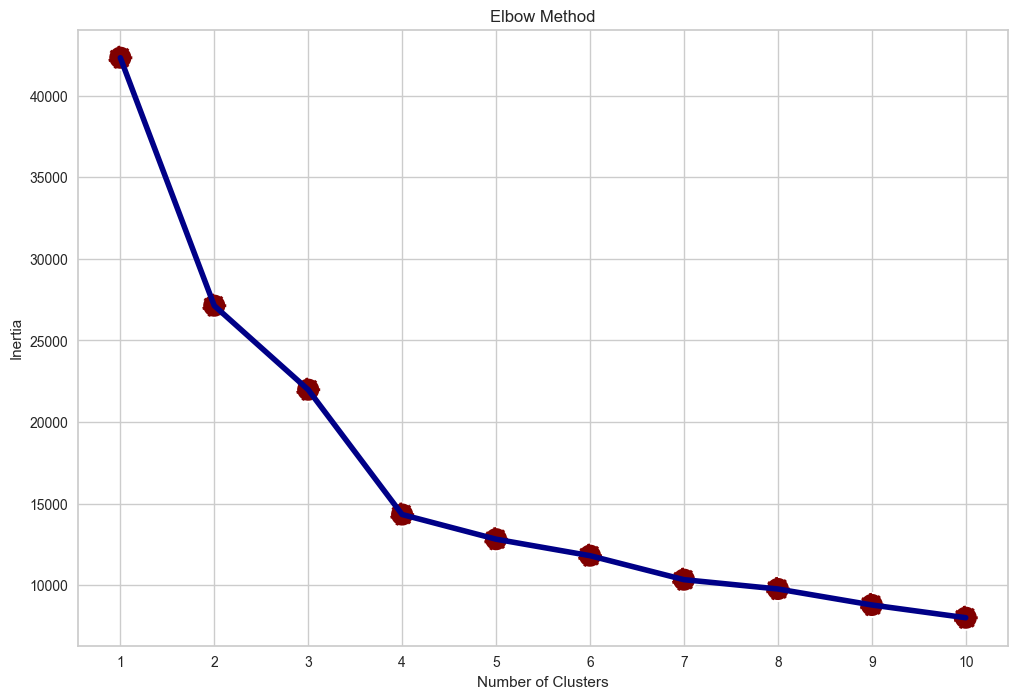

In [47]:
# Calculates inertia values for 2 to 10 clusters
inertia = []

for k in range(1, 11):
    # Fit KMeans clustering model 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(12, 8))
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.xticks(range(1,11))
plt.title('Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [48]:
# See the difference in inertia percentage for each additional cluster

((pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100).dropna()

0    35.898762
1    18.973077
2    34.799467
3    10.542139
4     7.881783
5    12.446272
6     5.523000
7    10.020585
8     8.889729
dtype: float64

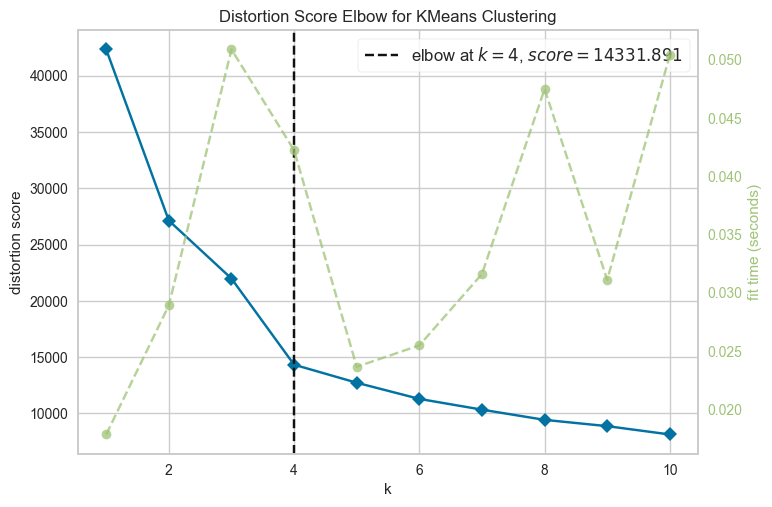

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
data = rfm_scaled

# Define the KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(), k=(1, 11))  # Adjust k range as needed

# Fit the data to the visualizer
visualizer.fit(data)

# Show the elbow plot
visualizer.show()

In [50]:
# Run and train main K-means algorithm based on all input features
model = KMeans(n_clusters=4, random_state=42)
model.fit(rfm_scaled)

# Review output cluster labels
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)

# Review Centroids of clusters
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)

Assigned cluster labels: 
 [0 1 0 ... 3 2 0]
Location of centroids: 
[[-0.40574524  0.39421088 -0.24012017]
 [ 1.08498623  0.42352999 -0.2309791 ]
 [-1.21001681 -1.50190837 -0.1689781 ]
 [ 0.06731517  0.16266536  2.79257171]]


In [51]:
# Append clusters to input features table
rfm_scaled['Cluster'] = cluster_labels

rfm_scaled.head()

,Recency,Frequency,Monetary,Cluster
0,-0.381186,0.968749,-0.006230,0
1,1.127762,1.329012,-0.748148,1
2,-0.381186,0.856167,-0.755472,0
3,0.121797,-0.787533,-0.558987,0
4,0.624779,0.293256,-0.197502,1


In [52]:
# PCA and Visualization of Clusters

pca = PCA(n_components=2)
pca.fit(rfm_scaled)
pcs = pca.transform(rfm_scaled)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,0.924043,-0.286884
1,1.625432,0.400985
2,1.083395,-0.862575
3,0.238300,-0.987697
4,0.551793,0.245410


<Axes: xlabel='PC 1', ylabel='PC 2'>

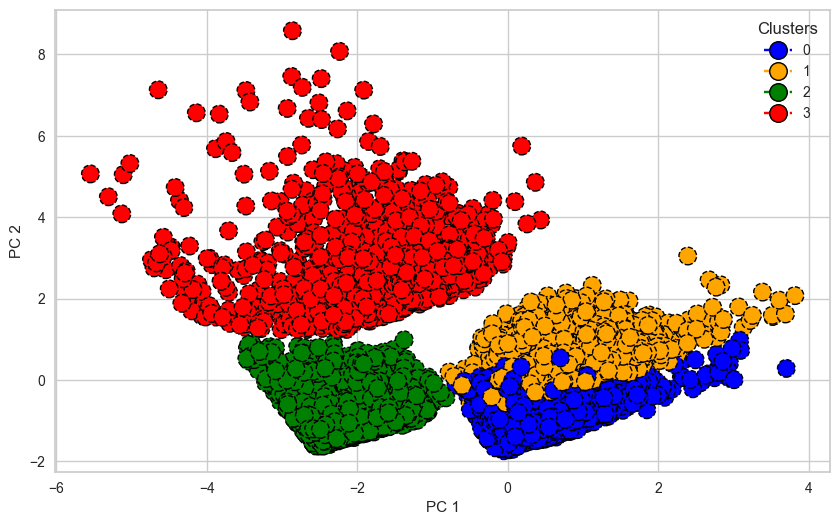

In [53]:
# Visualization of cluster distribution

pca = PCA(n_components=2)

pca.fit(rfm_scaled)
pcs = pca.transform(rfm_scaled)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['Clusters'] = rfm_scaled['Cluster']
data_pca.head()

fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="Clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red'],
    s=160,
    ax=ax
)

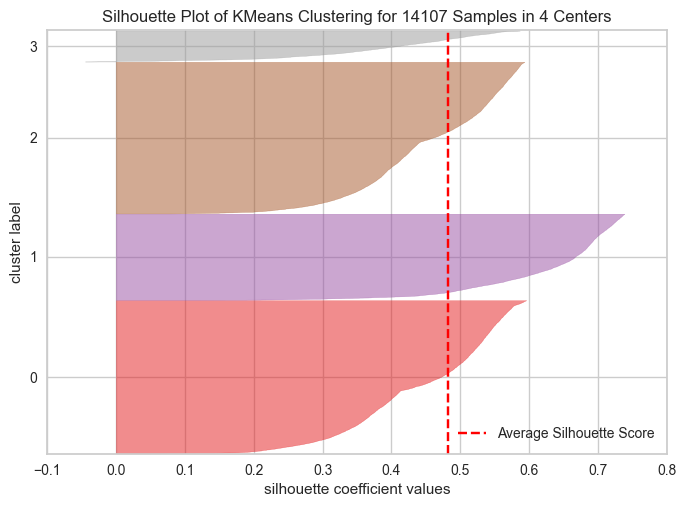

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 14107 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
# Visualize the cluster suign Silhoutte Visualizer

model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(rfm_scaled)
visualizer.show()

In [55]:
# Append clusters to input features table
customer['Cluster'] = cluster_labels

customer.head()

,Loyalty Number,Enrollment Year,Flights Booked,CLV,Recency,Frequency,Monetary,Cluster
0,100018,2016,157,7919.20,9,157,7919.20,0
1,100102,2013,173,2887.74,12,173,2887.74,1
2,100140,2016,152,2838.07,9,152,2838.07,0
3,100214,2015,79,4170.57,10,79,4170.57,0
4,100272,2014,127,6622.05,11,127,6622.05,1
